In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
from keras import backend as k
import matplotlib.pyplot as plt
from matplotlib import pyplot

Using TensorFlow backend.


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [ ]:
# our layers 
x = Flatten()(vgg.output)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

In [ ]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:



# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:

import matplotlib as mpl

def plotgraph(trainlossacc,labeltrain,vallossacc,labelval,title,filename):
    mpl.style.use('seaborn')
    plt.figure(figsize=(13,7))
    plt.plot(r.history[trainlossacc], label=labeltrain,color='green')
    plt.plot(r.history[vallossacc], label=labelval,color='orange')
    plt.title(title,fontsize=20,color='C6')
    plt.legend()
    plt.savefig(filename)
    plt.show()
    
plotgraph('loss','train loss','val_loss','val loss','Validation and Actual Loss','LossVal_loss.png')
plotgraph('acc','train acc','val_acc','val acc','Validation and Actual Accuracy','AccVal_acc.png')

In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [2]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [3]:
mymodel1 = load_model('model_vgg16.h5')
mymodel=Model(inputs=mymodel1.inputs,outputs=mymodel1.layers[1].output)
img =image.load_img('Datasets/valid/Benign/13403_idx5_x1301_y651_class0.png',target_size=(224,224)) 
input_img = image.img_to_array(img) 
input_img = np.expand_dims(input_img,axis=0) 
img_data = preprocess_input(input_img)
feature_maps=mymodel.predict(img_data)
classes = mymodel1.predict(img_data).tolist()
getindex= np.argmax(classes)
if (getindex==0):
    result = "Benign"
else:
    result = "Malignant"
print(classes,result)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[[1.0, 3.2777549634946096e-26]] Benign


In [ ]:
# square = 8
# ix=1
# for _ in range(square):
#     for _ in range(square):
#         ax=pyplot.subplot(square,square,ix)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         pyplot.imshow(feature_maps[0,:,:,ix-1],cmap='gray')
#         ix +=1
# pyplot.show()

In [4]:
newmodel1 = load_model('model_vgg16.h5')
ixs=[1,2,6,7,12,13]
outputs =[newmodel1.layers[i+1].output for i in ixs]
newmodel = Model(inputs=newmodel1.inputs,outputs=outputs)

img =image.load_img('Datasets/valid/Malignant/13403_idx5_x1201_y151_class1.png',target_size=(224,224)) 
input_img = image.img_to_array(img) 
input_img = np.expand_dims(input_img,axis=0) 
img_data = preprocess_input(input_img)
feature_maps=newmodel.predict(img_data)
classes = newmodel1.predict(img_data).tolist()
getindex= np.argmax(classes)
if (getindex==0):
    result = "Benign"
else:
    result = "Malignant"
print(classes,result)

[[1.0028332331213363e-10, 1.0]] Malignant


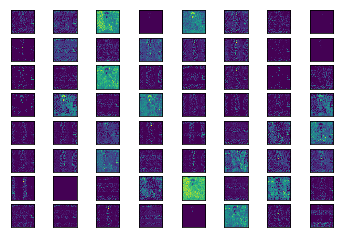

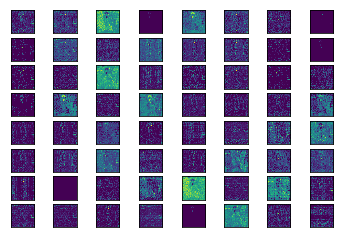

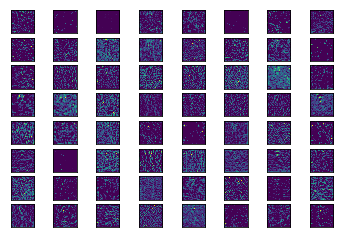

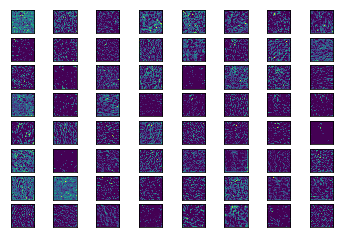

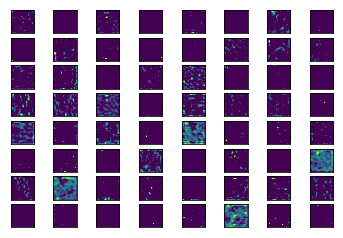

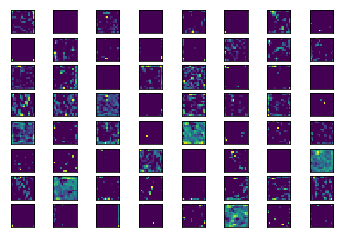

In [5]:
square =8
for fmap in feature_maps:
    ix=1
    for _ in range(square):
        for _ in range(square):
            ax=pyplot.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(fmap[0,:,:,ix-1],cmap='viridis')
            ix +=1
    pyplot.show()

In [ ]:
img =image.load_img('Datasets/valid/Malignant/13403_idx5_x1201_y151_class1.png',target_size=(224,224)) 
input_img = image.img_to_array(img) 
input_img = np.expand_dims(input_img,axis=0) 
img_data = preprocess_input(input_img)

classes = mymodel.predict(img_data).tolist()
getindex= np.argmax(classes)
if (getindex==0):
    result = "Benign"
else:
    result = "Malignant"
print(classes,result)

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [15]:
valid_datagen = ImageDataGenerator(rescale = 1./255)
valid_set = test_datagen.flow_from_directory('Datasets/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
valid_imgs,valid_labels = next(valid_set)

Found 312 images belonging to 2 classes.


In [27]:
predictions = mymodel.predict_generator(valid_set,steps=1,verbose=0)
print(np.round(predictions[:,0]))

[[[-0.  0. -0. ...  0.  1.  0.]
  [-0.  0.  1. ... -0.  3.  2.]
  [-0.  0.  1. ... -0.  3.  2.]
  ...
  [-0.  0.  1. ... -0.  2.  1.]
  [-0.  0.  1. ... -0.  2.  1.]
  [ 1.  0.  1. ...  0.  4.  3.]]

 [[-0.  0. -0. ...  0.  1.  0.]
  [-0.  0.  0. ... -0.  2.  1.]
  [-0.  0.  0. ... -0.  2.  1.]
  ...
  [-0.  0.  1. ... -0.  2.  1.]
  [-0.  0.  1. ... -0.  2.  1.]
  [ 1.  0.  1. ...  0.  4.  3.]]

 [[-0.  0. -0. ...  1.  1.  0.]
  [-0.  0.  0. ...  0.  2.  1.]
  [-0.  0.  0. ...  0.  2.  1.]
  ...
  [-0.  0.  1. ... -0.  3.  2.]
  [-0.  0.  1. ... -0.  3.  2.]
  [ 1.  0.  1. ...  0.  4.  3.]]

 ...

 [[-0.  0.  0. ...  1.  1.  0.]
  [-0.  0.  0. ...  0.  2.  1.]
  [-0.  0.  0. ...  0.  2.  1.]
  ...
  [-0.  0.  1. ... -0.  3.  2.]
  [-0.  0.  1. ... -0.  3.  2.]
  [ 1.  0.  1. ...  0.  4.  3.]]

 [[-0.  0. -0. ...  0.  1.  0.]
  [-0.  0.  1. ... -0.  3.  2.]
  [-0.  0.  1. ... -0.  3.  2.]
  ...
  [-0.  0.  1. ... -0.  2.  1.]
  [-0.  0.  1. ... -0.  2.  1.]
  [ 1.  0.  1. ...  0.  3.  

In [ ]:
# classes=np.argmax(valid_labels,axis=1)
# predicted_classes = np.argmax(np.round(predictions),axis=1)

In [ ]:
cm=np.argmax(predictions,axis=1)

In [28]:
cm=[]
for i in range(32):
    cm.append(np.argmax(predictions[i]))


In [31]:
print(f'prediction: {cm}\n')

prediction: [1241887, 1362271, 3174687, 2911711, 148895, 272735, 1244191, 2665759, 3051935, 1684575, 157215, 2395615, 917599, 2465311, 1688607, 2460703, 1683999, 723231, 668703, 74335, 2322783, 2979423, 202207, 2840031, 1444575, 1688607, 285087, 1367199, 659807, 3106399, 273887, 27935]

